In [ ]:
# This notebook doesn't belong to the official Ironhack documentation

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/CDD.csv', sep='\t')

In [16]:
data.head()

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,...,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,...,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,...,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,...,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,...,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [29]:
data.dtypes

EVENT CATEGORY                     object
EVENT GROUP                        object
EVENT SUBGROUP                     object
EVENT TYPE                         object
PLACE                              object
EVENT START DATE                   object
COMMENTS                           object
FATALITIES                        float64
INJURED / INFECTED                float64
EVACUATED                         float64
ESTIMATED TOTAL COST              float64
NORMALIZED TOTAL COST             float64
EVENT END DATE                     object
FEDERAL DFAA PAYMENTS             float64
PROVINCIAL DFAA PAYMENTS          float64
PROVINCIAL DEPARTMENT PAYMENTS    float64
MUNICIPAL COSTS                   float64
OGD COSTS                         float64
INSURANCE PAYMENTS                float64
NGO PAYMENTS                      float64
UTILITY - PEOPLE AFFECTED         float64
MAGNITUDE                         float64
dtype: object

In [37]:
data.isnull().sum()

EVENT CATEGORY                       0
EVENT GROUP                          0
EVENT SUBGROUP                       0
EVENT TYPE                           0
PLACE                                0
EVENT START DATE                     0
COMMENTS                             0
FATALITIES                          89
INJURED / INFECTED                 115
EVACUATED                           70
ESTIMATED TOTAL COST               531
NORMALIZED TOTAL COST              531
EVENT END DATE                       0
FEDERAL DFAA PAYMENTS              604
PROVINCIAL DFAA PAYMENTS           678
PROVINCIAL DEPARTMENT PAYMENTS     997
MUNICIPAL COSTS                   1060
OGD COSTS                         1075
INSURANCE PAYMENTS                1017
NGO PAYMENTS                      1081
UTILITY - PEOPLE AFFECTED           83
MAGNITUDE                          114
dtype: int64

In [41]:
data.count()

EVENT CATEGORY                    1089
EVENT GROUP                       1089
EVENT SUBGROUP                    1089
EVENT TYPE                        1089
PLACE                             1089
EVENT START DATE                  1089
COMMENTS                          1089
FATALITIES                        1000
INJURED / INFECTED                 974
EVACUATED                         1019
ESTIMATED TOTAL COST               558
NORMALIZED TOTAL COST              558
EVENT END DATE                    1089
FEDERAL DFAA PAYMENTS              485
PROVINCIAL DFAA PAYMENTS           411
PROVINCIAL DEPARTMENT PAYMENTS      92
MUNICIPAL COSTS                     29
OGD COSTS                           14
INSURANCE PAYMENTS                  72
NGO PAYMENTS                         8
UTILITY - PEOPLE AFFECTED         1006
MAGNITUDE                          975
dtype: int64

In [46]:
columns=['PROVINCIAL DEPARTMENT PAYMENTS', 'MUNICIPAL COSTS', 'OGD COSTS', 'INSURANCE PAYMENTS', 'NGO PAYMENTS']
cleaned_data = data.drop(columns=columns, axis=1)

In [47]:
cleaned_data

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,0.0,0.0,25/12/2016 12:00:00 AM,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,0.0,0.0,29/11/2016 12:00:00 AM,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,0.0,0.0,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,16700000.0,780373.8,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,0.0,0.0,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,01/03/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,NaN,NaN,01/03/1902 12:00:00 AM,NaN,NaN,0.0,0.0
1085,Incident,Technology,Explosion,Non-Residential,Cranberry BC,01/01/1902 12:00:00 AM,"Cranberry BC, 1902. An explosion in the Extens...",32.0,0.0,0.0,NaN,NaN,01/01/1902 12:00:00 AM,NaN,NaN,0.0,0.0
1086,Incident,Technology,Explosion,Non-Residential,Grand Forks BC,01/01/1901 12:00:00 AM,"Grand Forks BC, 1901. An explosion in the Unio...",64.0,0.0,0.0,NaN,NaN,01/01/1901 12:00:00 AM,NaN,NaN,0.0,0.0
1087,Incident,Technology,Infrastructure failure,Manufacturing / Industry,Wellington BC,01/01/1901 12:00:00 AM,"Wellington BC, 1901. Sixteen people were entom...",16.0,0.0,0.0,NaN,NaN,01/01/1901 12:00:00 AM,NaN,NaN,0.0,0.0


# Correlation Matrix

In [48]:
# Compute the correlation matrix
corr = cleaned_data.corr()
corr

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,0.014838,-0.020317,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,0.311491,0.404215,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,0.406679,0.083692,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.796016,0.571493,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.770445,0.577570,0.415388,0.049626
FEDERAL DFAA PAYMENTS,0.014838,0.311491,0.406679,0.796016,0.770445,1.000000,0.626224,0.022835,0.003859
PROVINCIAL DFAA PAYMENTS,-0.020317,0.404215,0.083692,0.571493,0.577570,0.626224,1.000000,-0.003366,0.119110
UTILITY - PEOPLE AFFECTED,-0.001548,-0.001498,-0.002430,0.412833,0.415388,0.022835,-0.003366,1.000000,-0.002231
MAGNITUDE,-0.003988,-0.003356,-0.005672,0.064788,0.049626,0.003859,0.119110,-0.002231,1.000000


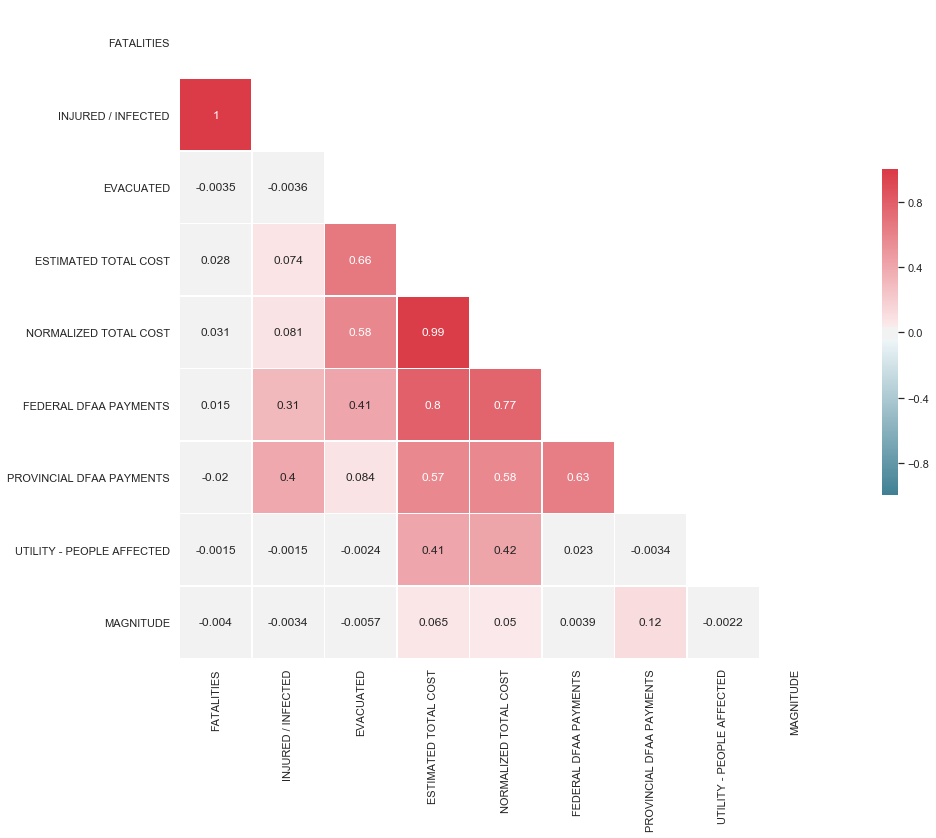

In [53]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [75]:
# Highly positive correlated columns: ('FATALITIES', 'INJURED / INFECTED')
# Negative correlated columns: None
# No correlation between columns: ('PROVINCIAL DEPARTMENT PAYMENTS' 'INJURED / INFECTED')

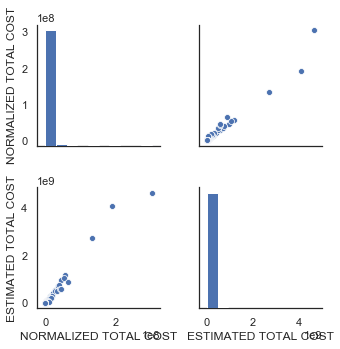

In [87]:
sns.pairplot(no_outliers[['NORMALIZED TOTAL COST', 'ESTIMATED TOTAL COST']], dropna=True)

In [ ]:
# There's an obvious correlation between the 2 columns as shown in the plots

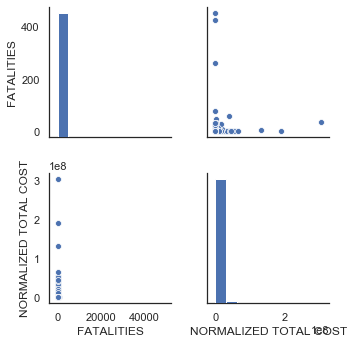

In [90]:
sns.pairplot(data[['FATALITIES', 'NORMALIZED TOTAL COST']])

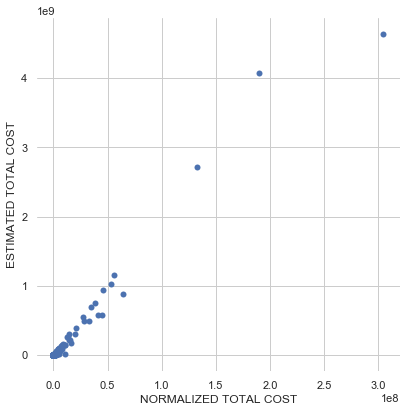

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

x = cleaned_data['NORMALIZED TOTAL COST']
y = cleaned_data['ESTIMATED TOTAL COST']

sns.scatterplot(x=x, y=y,
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=cleaned_data, ax=ax)

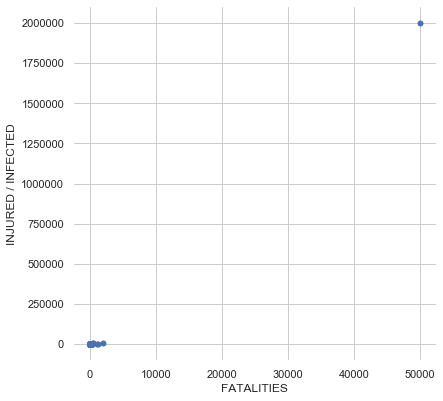

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

x = cleaned_data['FATALITIES']
y = cleaned_data['INJURED / INFECTED']

sns.scatterplot(x=x, y=y,
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=cleaned_data, ax=ax,)